# ReadMe
There are only 2 things you can do to improve your score  
Get better Features and  
Selecting and tuning your model  
You only have 2 types of features - numeric and categorical  
Go through each one. one by one.  
methodically explore and exhaust all possibilities  
With regards to your model,  
start with the basics. RandomForest, LinearRegression  
Keep doing them until you hit a wall  
Until you fully maxed out all their power  
Then you start exploring other models  
Other ways of fine tuning  
This is all that you need to do to progress  
Don't aim to improve your score  
It is just a by-product.  
Your goal is to improve your process  
It is to love the process.  
Fall in love with going through each feature  
combining them to create new features  
Embrace boredom.  
Fight the urge to browse the internet.  
You will not find answers there.  
The pain you feel is your brain adding new room  
for this new skill.  
Be fully aware of it.  
It is like the muscle when you go to the gym.  
  
It is like micheal in netflix.  
understand your craft and build and work on it every day.  
Mike was not competiting with other players.  
He was competiting with himself.  
He already figured out how to hack the game.  
He is just letting others play with him.  
  
After all of it,  
Your mind is your ultimate repository.  
build that and you gain the most valuable super power.  
Intiution.














# Load Data

In [16]:
import pandas as pd, numpy as np, seaborn as sns

df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
df.drop(columns=['Id'], inplace=True)

df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [18]:
num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'SalePrice'
num.remove(target)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=0)

# Explore

In [20]:
train['YearBuiltRemodel'] = train['YearBuilt'] * train['YearRemodAdd']
train['GarageCarArea'] = train['GarageArea'] * train['GarageCars']

In [21]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790636
GrLivArea           0.721707
GarageCarArea       0.698275
GarageCars          0.660927
GarageArea          0.646603
TotalBsmtSF         0.635535
1stFlrSF            0.620740
YearBuiltRemodel    0.579258
FullBath            0.578134
TotRmsAbvGrd        0.542658
YearBuilt           0.521242
YearRemodAdd        0.517822
GarageYrBlt         0.494154
MasVnrArea          0.493482
Fireplaces          0.470320
BsmtFinSF1          0.401390
LotFrontage         0.360274
OpenPorchSF         0.320193
2ndFlrSF            0.320141
WoodDeckSF          0.311813
HalfBath            0.283762
LotArea             0.252766
BsmtFullBath        0.226432
BsmtUnfSF           0.206736
BedroomAbvGr        0.182258
ScreenPorch         0.096740
3SsnPorch           0.057561
MoSold              0.041369
PoolArea            0.027441
BsmtHalfBath       -0.010994
BsmtFinSF2         -0.020622
LowQualFinSF       -0.023128
MiscVal            -0.024750
YrSold        

In [22]:
train[['GarageCars', 'GarageArea', 'GarageCarArea']]

,GarageCars,GarageArea,GarageCarArea
618,3,774,2322
870,1,308,308
92,2,432,864
817,3,857,2571
302,3,843,2529
...,...,...,...
763,3,856,2568
835,2,436,872
1216,2,539,1078
559,2,420,840


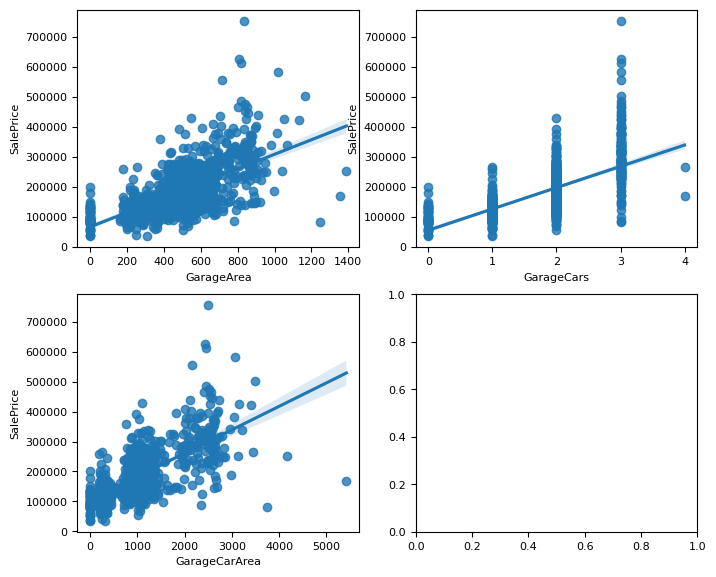

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2)
sns.regplot(train, x='GarageArea', y=target, ax=ax[0, 0]);
sns.regplot(train, x='GarageCars', y=target, ax=ax[0, 1]);
sns.regplot(train, x='GarageCarArea', y=target, ax=ax[1, 0]);

In [24]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790636
GrLivArea           0.721707
GarageCarArea       0.698275
GarageCars          0.660927
GarageArea          0.646603
TotalBsmtSF         0.635535
1stFlrSF            0.620740
YearBuiltRemodel    0.579258
FullBath            0.578134
TotRmsAbvGrd        0.542658
YearBuilt           0.521242
YearRemodAdd        0.517822
GarageYrBlt         0.494154
MasVnrArea          0.493482
Fireplaces          0.470320
BsmtFinSF1          0.401390
LotFrontage         0.360274
OpenPorchSF         0.320193
2ndFlrSF            0.320141
WoodDeckSF          0.311813
HalfBath            0.283762
LotArea             0.252766
BsmtFullBath        0.226432
BsmtUnfSF           0.206736
BedroomAbvGr        0.182258
ScreenPorch         0.096740
3SsnPorch           0.057561
MoSold              0.041369
PoolArea            0.027441
BsmtHalfBath       -0.010994
BsmtFinSF2         -0.020622
LowQualFinSF       -0.023128
MiscVal            -0.024750
YrSold        

# Pipeline

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]

In [28]:
class Engineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.loc[:, ['YearBuiltRemodel']] = X['YearBuilt'] * X['YearRemodAdd']
        X.loc[:, ['GarageCarArea']] = X['GarageArea'] * X['GarageCars']
        return X

In [29]:
num_pp = Pipeline([
    ('dataselect', DataSelect(num))
    , ('engineer', Engineer())
    , ('impute', SimpleImputer(strategy='median'))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(cat))
    , ('encoder', OneHotEncoder(sparse_output=False))
])

pipe = FeatureUnion([
    ('numeric', num_pp)
])

pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

# Model Selection

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
lin = LinearRegression()
lin.fit(train_pre, train[target])
np.sqrt(-cross_val_score(lin, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

30820.674808052234

In [32]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(train_pre, train[target])
np.sqrt(-cross_val_score(dtr, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

41917.948085592594

In [33]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(train_pre, train[target])
np.sqrt(-cross_val_score(rfr, train_pre, train[target], scoring='neg_mean_squared_error')).mean()

29276.45942896548

In [34]:
model_base = rfr

# Tune Model

In [35]:
model_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [36]:
from sklearn.model_selection import GridSearchCV
grd = GridSearchCV(model_base
                         , param_grid={ 'random_state': [0]
                                       , 'n_estimators': [100, 200, 300]
                                       , 'max_features': [2, 4, 8, 10]
                                      }
                         , scoring='neg_mean_squared_error')
# grd.fit(train_pre, train[target])
# grd.best_params_

In [37]:
model_tune = RandomForestRegressor(
    random_state=0
    , n_estimators=300
    , max_features=10
#     , max_leaf_nodes=None
#     , max_samples=None
)
model_tune.fit(train_pre, train[target]);

# Validation

In [38]:
print('base',
    np.sqrt(-cross_val_score(model_base, train_pre, train[target], scoring='neg_mean_squared_error')).mean(),
    np.sqrt(-cross_val_score(model_base, test_pre, test[target], scoring='neg_mean_squared_error')).mean()
)

print('tune',
    np.sqrt(-cross_val_score(model_tune, train_pre, train[target], scoring='neg_mean_squared_error')).mean(),
    np.sqrt(-cross_val_score(model_tune, test_pre, test[target], scoring='neg_mean_squared_error')).mean()
)

base 29276.45942896548 40865.70868404695
tune 28639.19850946302 39775.13266367901


    ## Multiplying YearBuilt * YearRemodAdd
    29305.91019299344 39817.936855094296
    28593.345346409456 39726.29547575848
    
    ## Baseline
    29701.66889770482 38888.041253125855
    28576.013401852346 38899.51112575973

# Submission

In [39]:
samp = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

pd.DataFrame({
    'Id': samp['Id']
    , 'SalePrice': model_tune.predict(pipe.transform(samp))
}).to_csv('submission.csv', index=False)